In [163]:
import cv2
import numpy as np
import pandas as pd
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import model_from_json

from keras.models import model_from_json

In [203]:
df_train = pd.read_csv('E:\datasets\EMNIST\emnist-letters-train.csv', sep=',',header=None)
df_test = pd.read_csv('E:\datasets\EMNIST\emnist-letters-test.csv', sep=',',header=None)


df_train.head
print(df_train.shape)
print(df_test.shape)



(88800, 785)
(14800, 785)


C:\Users\Public\Anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


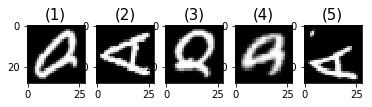

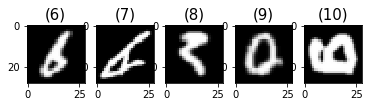

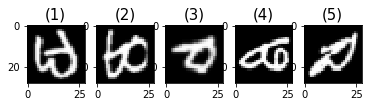

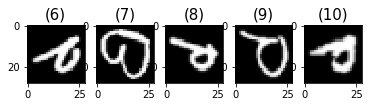

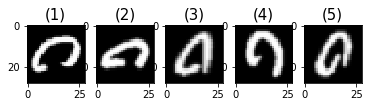

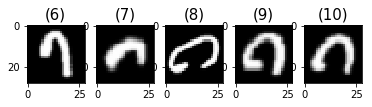

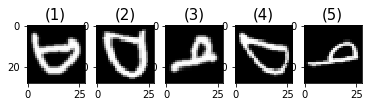

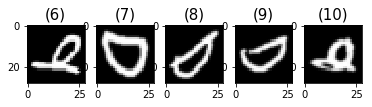

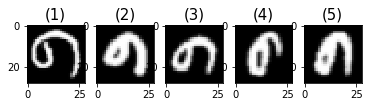

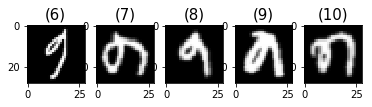

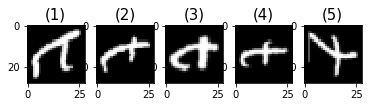

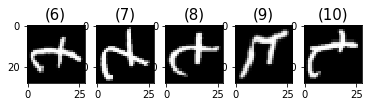

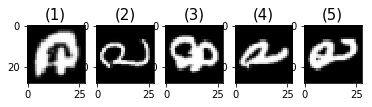

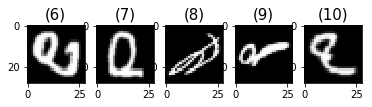

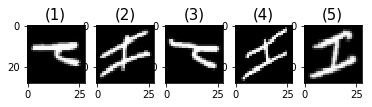

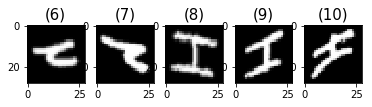

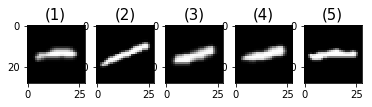

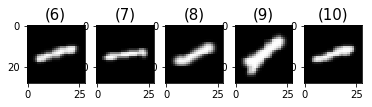

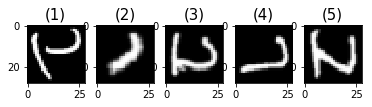

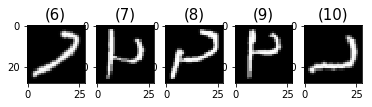

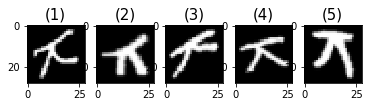

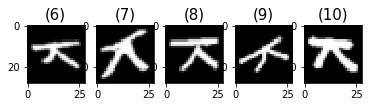

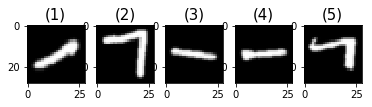

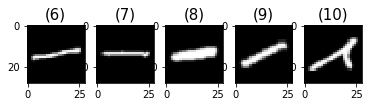

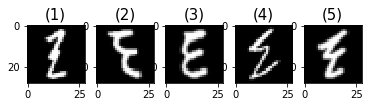

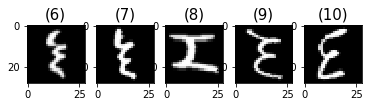

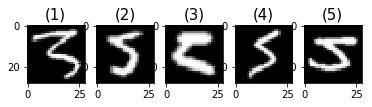

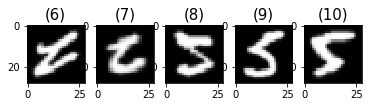

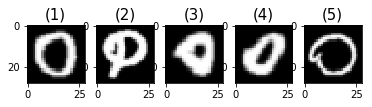

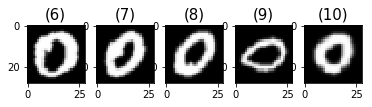

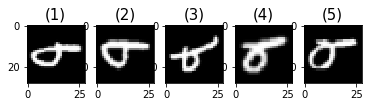

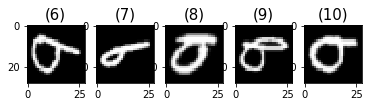

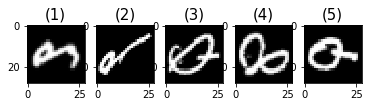

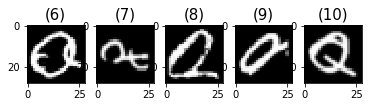

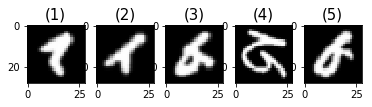

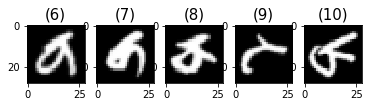

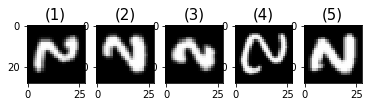

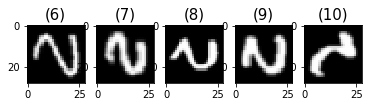

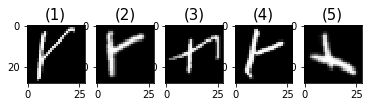

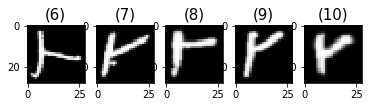

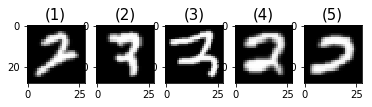

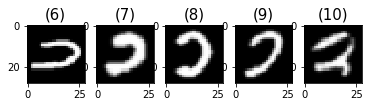

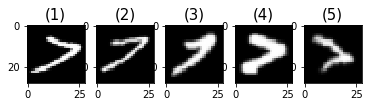

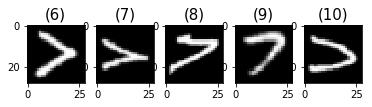

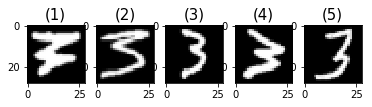

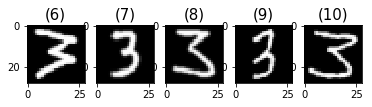

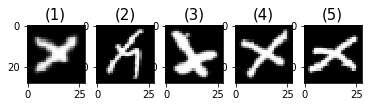

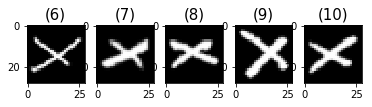

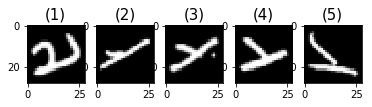

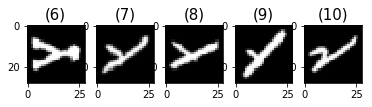

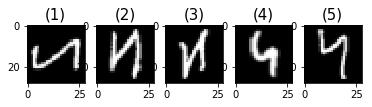

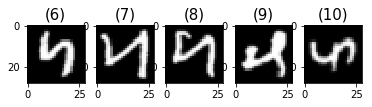

In [165]:
def show_images(images):
    """
    images : numpy arrays
    """
    n_images = len(images)
    titles = ['(%d)' % i for i in range(1, n_images + 1)]
    num = 5
    iter_num = np.ceil(n_images / num).astype(int)
    for i in range(iter_num):
        fig = plt.figure()
        sub_images = images[i * num:num * (i + 1)]
        sub_titles = titles[i * num:num * (i + 1)]
        for n, (image, title) in enumerate(zip(sub_images, sub_titles)):
            a = fig.add_subplot(1, np.ceil(len(sub_images)), n + 1)
            if image.ndim == 2:
                plt.gray()
            a.set_title(title, fontsize=15)
            plt.imshow(image)
            
            
for i in range(0,47):
    p = df_train[df_train[0]==i].head(10)
    p = p.drop(0, axis=1)
    p = p.values
    p = p.reshape(p.shape[0],28,28)
    show_images(p)

In [204]:
X_train = df_train.drop(0,axis=1).values
X_test = df_test.drop(0, axis=1).values
y_train = df_train[0].values
y_test = df_test[0].values


X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

In [205]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train[0].shape)

(28, 28)


In [206]:
for i in range(len(X_train)):
    X_train[i] = np.flip(X_train[i],1)
    X_train[i] = np.rot90(X_train[i])
    
for i in range(len(X_test)):
    X_test[i] = np.flip(X_test[i],1)
    X_test[i] = np.rot90(X_test[i])

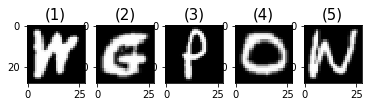

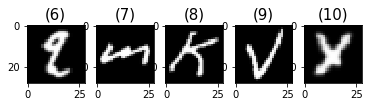

In [169]:
temp = X_train[:10]
show_images(X_train[:10])

In [207]:
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(88800,)
(88800, 28, 28)
(14800, 28, 28)
(14800,)


In [208]:
print(np.unique(y_train))
print(y_train.shape)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
#We map all the alphabets according to their respective number
y_test.map({1:'A', 2:'B', 3:'C', 4:'D', 5:'E', 6:'F', 7:'G', 8:'H', 9:'I', 10:'J', 11:'K', 12:'L', 13:'M', 14:'N', 15:'O', 16:'P', 17:'Q', 18:'R', 19:'S', 20:'T', 21:'U', 22:'V', 23:'W', 24:'X', 25:'Y', 26:'Z'})
y_train.map({1:'A', 2:'B', 3:'C', 4:'D', 5:'E', 6:'F', 7:'G', 8:'H', 9:'I', 10:'J', 11:'K', 12:'L', 13:'M', 14:'N', 15:'O', 16:'P', 17:'Q', 18:'R', 19:'S', 20:'T', 21:'U', 22:'V', 23:'W', 24:'X', 25:'Y', 26:'Z'})



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
(88800,)


0        W
1        G
2        P
3        O
4        W
5        Q
6        M
7        K
8        V
9        X
10       J
11       N
12       R
13       U
14       Z
15       U
16       U
17       X
18       S
19       E
20       B
21       Y
22       I
23       E
24       J
25       U
26       K
27       X
28       L
29       A
        ..
88770    B
88771    P
88772    P
88773    M
88774    G
88775    S
88776    G
88777    O
88778    D
88779    L
88780    K
88781    C
88782    T
88783    Q
88784    R
88785    G
88786    O
88787    D
88788    D
88789    U
88790    N
88791    H
88792    F
88793    Q
88794    S
88795    A
88796    U
88797    A
88798    W
88799    L
Length: 88800, dtype: object

In [209]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [210]:
y_train.shape


(88800,)

In [174]:
#Define the Convolution neural nwteork model

def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(27, activation='softmax'))

    return model

In [211]:
X_train = X_train.reshape(88800,28,28,1)
y_train = to_categorical(y_train)

In [176]:
cnn_model = createModel()
batch_size = 2048
epochs = 25
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#fit function return history of the whole model while it is trained
history = cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/25
88800/88800 [==============================] - 154s 2ms/step - loss: 2.6987 - acc: 0.2072
Epoch 2/25
88800/88800 [==============================] - 154s 2ms/step - loss: 1.6381 - acc: 0.4873
Epoch 3/25
88800/88800 [==============================] - 155s 2ms/step - loss: 1.1152 - acc: 0.6413
Epoch 4/25
88800/88800 [==============================] - 153s 2ms/step - loss: 0.8288 - acc: 0.7328
Epoch 5/25
88800/88800 [==============================] - 152s 2ms/step - loss: 0.6532 - acc: 0.7882
Epoch 6/25
88800/88800 [==============================] - 153s 2ms/step - loss: 0.5464 - acc: 0.8228
Epoch 7/25
88800/88800 [==============================] - 154s 2ms/step - loss: 0.4748 - acc: 0.8462
Epoch 8/25
88800/88800 [==============================] - 153s 2ms/step - loss: 0.4172 - acc: 0.8649
Epoch 9/25
88800/88800 [==============================] - 153s 2ms/step - loss: 0.3787 - acc: 0.8760
Epoch 10/25
88800/88800 [==============================] - 152s 2ms/step - loss: 0.3503 - a

In [177]:

def save_model(model):
    cnn_model_json = model.to_json()
    with open("cnn_model.json", "w") as json_file:
        json_file.write(cnn_model_json) 
# serialize weights to HDF5
    model.save_weights("cnn_model.h5")
    print("Saved model to disk")


In [178]:

save_model(cnn_model)

Saved model to disk


In [212]:
show_test = np.copy(X_test)

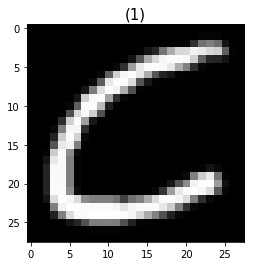

In [216]:

temp_test = show_test[1754:1755]
show_images(temp_test)

In [217]:
X_test = X_test.reshape(14800,28,28,1)

In [218]:

ans = cnn_model.predict(X_test[1754:1755])
out = np.argmax(ans)

In [219]:

print(out)


3
